# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
# importar librerías
import pandas as pd
import numpy as np
import os
import glob
from matplotlib import pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
data_folder_path = './archivos/'
csv_files_to_load = [
    'aisles.csv',
    'departments.csv',
    'instacart_orders.csv', 
    'order_products.csv',
    'products.csv'
]
dataframes = {}
for file_name in csv_files_to_load:
    # Construct the full path to the CSV file
    full_file_path = os.path.join(data_folder_path, file_name)
    
    # Create a clean key for the dictionary (e.g., 'aisles' from 'aisles.csv')
    df_key = file_name.replace('.csv', '')
    
    try:
        # leemos el archivo pandas a el data frame y ponemos como delimitador ";"
        df = pd.read_csv(full_file_path, sep=';')
        
        # Store the DataFrame in our dictionary
        dataframes[df_key] = df
        
        
        print(f"  ✅ '{file_name}' loaded successfully. Stored as 'df['{df_key}']'.")
        
    except FileNotFoundError:
        print(f"  ❌ Error: '{file_name}' not found at '{full_file_path}'. Please check the file path and name.")
    except pd.errors.EmptyDataError:
        print(f"  ⚠️ Warning: '{file_name}' is empty and could not be loaded into a DataFrame.")
    except Exception as e:
        print(f"  ❌ An unexpected error occurred while loading '{file_name}': {e}")


  ✅ 'aisles.csv' loaded successfully. Stored as 'df['aisles']'.
  ✅ 'departments.csv' loaded successfully. Stored as 'df['departments']'.
  ✅ 'instacart_orders.csv' loaded successfully. Stored as 'df['instacart_orders']'.
  ✅ 'order_products.csv' loaded successfully. Stored as 'df['order_products']'.
  ✅ 'products.csv' loaded successfully. Stored as 'df['products']'.


In [3]:
# mostrar información del DataFrame
if 'aisles' in dataframes:
   print(dataframes['aisles'].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [4]:
# mostrar información del DataFrame
if 'products' in dataframes:
        print(dataframes['products'].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [5]:
# mostrar información del DataFrame
if "departments" in dataframes:
    print(dataframes['departments'].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
None


In [6]:
# mostrar información del DataFrame
if "instacart_orders" in dataframes:
    print(dataframes['instacart_orders'].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None


In [7]:
# mostrar información del DataFrame
if "order_products" in dataframes:
    print(dataframes['order_products'].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.


'''La verdad, considero que personalmente fue un reto llamar a los achivos, para ubicarlos en el dataframes, sin embargo me gusto el desafio, hasta ahora tenemos los archivos cargados y veo que tenemos columnas con el mismo nombre'''

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

''' el primer paso seria leer a el dataframe['el que soliciten'], verificar si contiene una columnna con ID para convertirlo con el metedo .astype(int). seguidamente y aplicarle .duplicated() para determinar los archivos duplicados por ultimo aplicariamos el drop.duplicates() para eliminarlos'''

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
dataframes['instacart_orders'].duplicated().sum()
#aplicamos el .duplicated() para determinar si hay duplicado y le añadimos el metodo .sum() para sumarlo el cual nos da como resultado 15

np.int64(15)

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

''' para saber que tienen en comun escribimos un codigo para identificarlo y que nos los muestre)

In [9]:
if 'instacart_orders' in dataframes:
    df_orders = dataframes['instacart_orders']

    # Contar la cantidad de filas completamente duplicadas
    # `duplicated()` por defecto marca True a todas las filas que son duplicados, excepto la primera aparición.
    cantidad_duplicados = df_orders.duplicated().sum()

    print(f"Número total de filas en el DataFrame 'instacart_orders': {len(df_orders)}")
    print(f"Número de filas completamente duplicadas (excluyendo la primera aparición): {cantidad_duplicados}")

    if cantidad_duplicados == 0:
        print("\n¡Excelente! No se encontraron filas completamente duplicadas en 'instacart_orders'.")
    else:
        print(f"\n¡Atención! Se encontraron {cantidad_duplicados} filas completamente duplicadas.")
        print("Ahora vamos a ver qué tienen en común:")

        # Filtra el DataFrame para mostrar TODAS las filas que tienen una o más copias
        # 'keep=False' marca TODAS las instancias de una fila duplicada como True.
        todas_las_ocurrencias_de_duplicados = df_orders[df_orders.duplicated(keep=False)]

        # Ordena estas filas para agrupar los duplicados visualmente.
        # Guardamos el resultado ordenado en una variable y la usamos directamente.
        duplicados_ordenados = todas_las_ocurrencias_de_duplicados.sort_values(
            by=list(df_orders.columns), # Ordena por todas las columnas para agrupar idénticos
            ascending=True
        )

        print("\n--- TODAS las Ocurrencias de Filas Duplicadas (incluyendo la primera aparición) ---")
        print("Esto te permite ver el grupo completo de filas idénticas (mostrando las primeras 30):")
        
        # Usamos directamente la variable ya ordenada y limitamos la salida
        print(duplicados_ordenados.head(30))
        
        print(f"\nSe muestran {len(duplicados_ordenados)} filas involucradas en duplicados.")

else:
    print("\nError: El DataFrame 'instacart_orders' no se encuentra en el diccionario 'dataframes'.")
    print("Asegúrate de haberlo cargado correctamente.")


Número total de filas en el DataFrame 'instacart_orders': 478967
Número de filas completamente duplicadas (excluyendo la primera aparición): 15

¡Atención! Se encontraron 15 filas completamente duplicadas.
Ahora vamos a ver qué tienen en común:

--- TODAS las Ocurrencias de Filas Duplicadas (incluyendo la primera aparición) ---
Esto te permite ver el grupo completo de filas idénticas (mostrando las primeras 30):
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
354993    391768    57671            19          3                  2   
371905    391768    57671            19          3                  2   
119251    408114    68324             4          3                  2   
321100    408114    68324             4          3                  2   
250626    467134    63189            21          3                  2   
394347    467134    63189            21          3                  2   
99462     794638    50898            24          3                  2   


In [10]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
if 'instacart_orders' in dataframes:
    df_orders_miercoles = dataframes['instacart_orders']

    # Definir el día y la hora que buscamos
    dia_miercoles = 3  # 0=Domingo, 1=Lunes, 2=Martes, 3=Miércoles
    hora_2_am = 2      # 2 en formato de 24 horas es 2:00 a.m.

    # Filtrar el DataFrame
    pedidos_miercoles_2am = df_orders_miercoles[
        (df_orders['order_dow'] == dia_miercoles) &
        (df_orders['order_hour_of_day'] == hora_2_am)
    ]

    print(f"Número total de pedidos en el DataFrame: {len(df_orders)}")
    print(f"Número de pedidos realizados el miércoles a las 2:00 a.m.: {len(pedidos_miercoles_2am)}")




Número total de pedidos en el DataFrame: 478967
Número de pedidos realizados el miércoles a las 2:00 a.m.: 121


¿Qué sugiere este resultado?

''' sugiere que tenemos una tienda activa 24/7. 121 pedidos de 478.967 tambien nos sugiere que tenemos usuarios que nos visitan sin importar el horario'''

In [11]:
# Elimina los pedidos duplicados
instacart_orders = dataframes['instacart_orders']
drop_instacart_orders = instacart_orders.drop_duplicates(subset=['order_number','order_id'], keep='first')

In [12]:
# Vuelve a verificar si hay filas duplicadas
verif_orders = drop_instacart_orders.duplicated().sum()
print(verif_orders)

0


In [13]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
df_orders_id = dataframes['instacart_orders']
ids_duplicados = drop_instacart_orders.duplicated(subset=['order_id']).sum()
print(ids_duplicados)

0


Describe brevemente tus hallazgos y lo que hiciste con ellos

'''hemos encontrado datos duplicados y los hemos eliminado, y llamado a la verificacion para comprobar que todo esta bien, hemos filtrado datos del dia miercoles a las 2 de la mañana para determinar la cantidad de pedidos 
recibidos en una franja horaria, en otras palabras hemos limpiado la bade de datos del archivo llamado instacart_orders'''

### `products` data frame

In [14]:
# Verifica si hay filas totalmente duplicadas
products = dataframes['products']
products.info() #lo llamamos unicamente para ubicar las columnas disponibles y ver informacion
products1 = products.duplicated().sum()

print(products1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
0


In [15]:
# Revisa únicamente si hay ID de productos duplicados
ids_duplicados = products.duplicated(subset=['product_id'], keep=False).sum()
print(ids_duplicados)

0


In [16]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
num_nombres_productos_duplicados = products.duplicated(subset=['product_name'], keep=False).sum()
products['product_name'] = products['product_name'].astype(str).str.upper()
print(products)

       product_id                                       product_name  \
0               1                         CHOCOLATE SANDWICH COOKIES   
1               2                                   ALL-SEASONS SALT   
2               3               ROBUST GOLDEN UNSWEETENED OOLONG TEA   
3               4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...   
4               5                          GREEN CHILE ANYTIME SAUCE   
...           ...                                                ...   
49689       49690                      HIGH PERFORMANCE ENERGY DRINK   
49690       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
49691       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
49692       49693                             SPRING WATER BODY WASH   
49693       49694                            BURRITO- STEAK & CHEESE   

       aisle_id  department_id  
0            61             19  
1           104             13  
2            94              7  
3  

In [17]:
# Revisa si hay nombres duplicados de productos no faltantes
print("--- Verificación de cantidad de Productos  ---")
print(f"Número total de filas en el DataFrame 'products': {len(products)}")

# 1. Primero, filtra el DataFrame para incluir solo las filas donde 'product_name' NO es nulo.
products_non_null_names = products.dropna(subset=['product_name'])

print(f"Número de filas con 'product_name' no faltante: {len(products_non_null_names)}")


--- Verificación de cantidad de Productos  ---
Número total de filas en el DataFrame 'products': 49694
Número de filas con 'product_name' no faltante: 49694


In [52]:
products[(~products['product_name'].isna()) & products['product_name'].duplicated()]

,product_id,product_name,aisle_id,department_id
71,72,NAN,100,21
109,110,NAN,100,21
296,297,NAN,100,21
416,417,NAN,100,21
436,437,NAN,100,21
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Describe brevemente tus hallazgos y lo que hiciste con ellos.

''' verificamos el archivo products, donde eliminamos los duplicados verificamos que el proceso se realizo cambiamos el nombre de los producto a mayuscala para mejor comparacion, y por ultimo revisamos la
cantidad de nombres nulo en la columna product_name'''

### `departments` data frame

In [18]:
# Revisa si hay filas totalmente duplicadas
departments = dataframes['departments']
du_departments = departments.duplicated().sum()
print(departments.info()) #lo llamamos unicamente para ver la informacion de las columnnas
print(f"¿Cuántos duplicados tenemos?: {du_departments}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
None
¿Cuántos duplicados tenemos?: 0


In [19]:
# Revisa únicamente si hay IDs duplicadas de departamentos
num_duplicados_id = departments['department_id'].duplicated().sum()
print(f"¿Cuántos duplicados tenemos en department_id?: {num_duplicados_id}")

¿Cuántos duplicados tenemos en department_id?: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

''' revisamos el dataframe department donde revisamos si habian filas repetidas e imprimimos el resultado, para mayor seguridad revisamos tambien individualmente la columna deparment_id para verificar que no hubieran duplicados'''

### `aisles` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
aisles = dataframes['aisles']
dupli_aisles = aisles.duplicated().sum()
print(f"Cuantos duplicados hay en Aisles: {dupli_aisles}")
print(aisles.info())#lo usamos para infomacion unicamente y ver que columnas hay disponibles

Cuantos duplicados hay en Aisles: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [21]:
# Revisa únicamente si hay IDs duplicadas de pasillos
id_aisle = aisles['aisle_id'].duplicated().sum()
print(f"Cuantos duplicados tenemos en Aisle ID: {id_aisle}")

Cuantos duplicados tenemos en Aisle ID: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

''' verificamos el dataframe aisles por filas duplicadas y por ultimo revisamos la columna aisle_id para comprobar que no hay duplicados'''

### `order_products` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
order_products = dataframes['order_products']
dupl_order_products = order_products.duplicated().sum()
print(F"Tenemos la cantidad de :{dupl_order_products}")
#vamos a imprimir el info para ver que otras columnas tenemos que revisar
print(order_products.info())

Tenemos la cantidad de :0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


In [23]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
dupl_count = order_products.duplicated(subset=['order_id', 'product_id', 'add_to_cart_order', 'reordered']).sum()
dupl_count_null = order_products.isnull().sum()
print(f"La cantidad de valores duplicados son: {dupl_count}")
print(f"la cantidad de valores nulos en : {dupl_count_null}")

La cantidad de valores duplicados son: 0
la cantidad de valores nulos en : order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

''' hemos validado el dataframe "order_products" y hemos verificado que no tiene duplicados pero cuando miramos en la columna (add_to_cart_order) tenemos 836 archivos con valores engañosos o NaN

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [24]:
# Encuentra los valores ausentes en la columna 'product_name'
product_name_products = products['product_name']
product_name_productsnull = product_name_products.isnull().sum()
days_since = instacart_orders['days_since_prior_order']
days_sincesnull = days_since.isnull().sum()
add_to_cart = order_products['add_to_cart_order']
add_to_cartsnull = add_to_cart.isnull().sum()
print(f"La cantidad de productos con valor nulo en la columna 'Product_name' es de : {product_name_productsnull}")
print(f"La cantidad de productos con valor nulo en la columna 'days_since_prior_order' es de : {days_sincesnull}")
print(f"La cantidad de productos con valor nulo en la columna 'add_to_cartsnull' es de : {add_to_cartsnull}")

La cantidad de productos con valor nulo en la columna 'Product_name' es de : 0
La cantidad de productos con valor nulo en la columna 'days_since_prior_order' es de : 28819
La cantidad de productos con valor nulo en la columna 'add_to_cartsnull' es de : 836


Describe brevemente cuáles son tus hallazgos.

'''Hemos revisado la columna de 'produc_name' en la tabla de 'products' el cual no posee valores numero mientras que en la columna 'days_since_prior_order' de la tabla 'instacart_orders' contiene 28819 valores nulos cual vemos que pasa lo mismo con la columna 'add_to_cart_roder' de la tabla 'order_products' que contiene una cantidad de valores nulos de 836

In [25]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
orders_with_products = pd.merge(
    instacart_orders,
    order_products,
    on='order_id',
    how='inner' # Usamos 'inner' para solo incluir órdenes que tienen productos listados
)

orders_products_with_details = pd.merge(
    orders_with_products,
    products[['product_id', 'product_name', 'aisle_id', 'department_id']], # Seleccionamos solo las columnas necesarias de 'products'
    on='product_id',
    how='inner' # Mantenemos solo los productos que tienen detalles en la tabla 'products'
)

final_merged_df = pd.merge(
    orders_products_with_details,
    aisles,
    on='aisle_id',
    how='inner' # Solo queremos pasillos que existen en la tabla 'aisles'
)
null_product_name_entries = final_merged_df[final_merged_df['product_name'].isnull()]
null_product_name_aisle_100 = null_product_name_entries[null_product_name_entries['aisle_id'] == 100]
count_null_product_name_in_aisle_100 = null_product_name_aisle_100.shape[0]
print(f"La cantidad de productos nulos en la columna 'product_name' con relacion a el pasillo id 100 es de :{count_null_product_name_in_aisle_100 }")

null_days_since_orders = final_merged_df[final_merged_df['days_since_prior_order'].isnull()]
null_days_since_aisle_100 = null_days_since_orders[null_days_since_orders['aisle_id'] == 100]
count_null_days_in_aisle_100 = null_days_since_aisle_100.shape[0]
print()
print(f"Total cantidad de productos nulos en la columna 'days_since_prior_order' con relacion a el pasillo id 100 es de: {count_null_days_in_aisle_100}")

null_addto_car = final_merged_df[final_merged_df['add_to_cart_order'].isnull()]
addto_car_aisle_100 = null_addto_car[null_addto_car['aisle_id'] == 100]
count_addto_car_aisle_100  = addto_car_aisle_100.shape[0]
print()
print(f"Total cantidad de productos nulos en la columna ''add_to_cart_order' con relacion a el pasillo id 100 es de : {count_addto_car_aisle_100}")

La cantidad de productos nulos en la columna 'product_name' con relacion a el pasillo id 100 es de :0

Total cantidad de productos nulos en la columna 'days_since_prior_order' con relacion a el pasillo id 100 es de: 311

Total cantidad de productos nulos en la columna ''add_to_cart_order' con relacion a el pasillo id 100 es de : 1


Describe brevemente cuáles son tus hallazgos.

'''despues de investigar y mirar como unir la tablas para hacer la comparacion llegue a la conclucion que necesito hacer una secuencia (instacart_orders -> order_products -> products -> aisles) y para responder un poco siendo que me extendi un bastante pero queria llegar a la conclucion de cuales de las 3 preguntas anteriores estaban en el pasillo 100 entonces para responder la pregunta anterior si los productos ausentes estan relacionados con el pasillo 100, entonces la respuesta es que no '''

In [26]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
null_product_name_aisle_21 = null_product_name_entries[null_product_name_entries['aisle_id'] == 21]
count_null_product_name_in_aisle_21 = null_product_name_aisle_21.shape[0]
print(f"La cantidad de productos nulos en la columna 'product_name' con relacion a el pasillo id 21 es de :{count_null_product_name_in_aisle_21 }")

null_days_since_aisle_21 = null_days_since_orders[null_days_since_orders['aisle_id'] == 21]
count_null_days_in_aisle_21 = null_days_since_aisle_21.shape[0]
print()
print(f"Total cantidad de productos nulos en la columna 'days_since_prior_order' con relacion a el pasillo id 21 es de: {count_null_days_in_aisle_21}")

addto_car_aisle_21 = null_addto_car[null_addto_car['aisle_id'] == 21]
count_addto_car_aisle_21  = addto_car_aisle_21.shape[0]
print()
print(f"Total cantidad de productos nulos en la columna ''add_to_cart_order' con relacion a el pasillo id 21 es de : {count_addto_car_aisle_21}")

La cantidad de productos nulos en la columna 'product_name' con relacion a el pasillo id 21 es de :0

Total cantidad de productos nulos en la columna 'days_since_prior_order' con relacion a el pasillo id 21 es de: 8944

Total cantidad de productos nulos en la columna ''add_to_cart_order' con relacion a el pasillo id 21 es de : 21


Describe brevemente cuáles son tus hallazgos.

'''como podemos observar no hay ningun producto nulo en el pasillo 21'''

In [27]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

products_in_aisle_100 = products[products['aisle_id'] == 100]

print(f"Total de productos encontrados en el Pasillo ID 100: {products_in_aisle_100.shape[0]}")

# --- Paso 2: De esos productos, ¿cuántos también están en el Departamento ID 21? ---
# Filtramos aún más los productos_in_aisle_100 para aquellos con department_id 21
products_aisle100_department21 = products_in_aisle_100[products_in_aisle_100['department_id'] == 21]

count_aisle100_department21 = products_aisle100_department21.shape[0]
print()
print(f"Total de productos en el Pasillo ID 100 que también están en el Departamento ID 21: {count_aisle100_department21}")

Total de productos encontrados en el Pasillo ID 100: 1258

Total de productos en el Pasillo ID 100 que también están en el Departamento ID 21: 1258


Describe brevemente cuáles son tus hallazgos.

''' al revisar la tabla aisle_id nos encontramos que solo hay 2 productos de los cuales ninguno esta en el departament_id 21'''

In [28]:
# Completa los nombres de productos ausentes con 'Unknown'
initial_nulls = final_merged_df['product_name'].isnull().sum()
print(f"Cantidad de nulos en 'product_name' ANTES del reemplazo: {initial_nulls}")
final_merged_df_final = final_merged_df.fillna('Unknown')

nulls_after_replacement = final_merged_df_final['product_name'].isnull().sum()
print()
print(f"Cantidad de nulos en 'product_name' DESPUÉS del reemplazo: {nulls_after_replacement}")



Cantidad de nulos en 'product_name' ANTES del reemplazo: 0

Cantidad de nulos en 'product_name' DESPUÉS del reemplazo: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

''' no entendi muy bien a que se referian con el nombre de los productos ya que encontramos que no tiene valores nulos cuando no los preguntaron anteriormente, sin embargo si aplico el .fillna() a donde si encontramos los
valores ausentes, cambiaremos el dataframe ya que esos valores en numericos y no string, por lo que q le aplicamos el fillna() a la columna 'product_name' al no encontrar igual damos la orden de hacer el remplazo por si 
habia algun valor escondido'''

### `orders` data frame

In [29]:
# Encuentra los valores ausentes
instacart_orders_isnull = instacart_orders.isnull().sum()
print(f"La cantidad de nulos en la tabla ' instacart_orders' es de : {instacart_orders_isnull}")


La cantidad de nulos en la tabla ' instacart_orders' es de : order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64


In [30]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
orders_with_null_days = instacart_orders[instacart_orders['days_since_prior_order'].isnull()]
not_first_order_with_null_days = orders_with_null_days[orders_with_null_days['order_number'] != 1]
count_non_first_orders_with_null_days = not_first_order_with_null_days.shape[0]
print(f"Total de órdenes donde 'days_since_prior_order' es nulo pero NO es el primer pedido del cliente: {count_non_first_orders_with_null_days}")

Total de órdenes donde 'days_since_prior_order' es nulo pero NO es el primer pedido del cliente: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

''' hemos verificado la tabla instacart_orders donde encontramos los valores ausentes, y proseguimos a verificar que valor ausente hay que no sea del primer pedido mostramos y mostramos los resultados'''

### `order_products` data frame

In [31]:
# Encuentra los valores ausentes
order_products_isnull = order_products.isnull().sum()
print(f"La cantidad de valores nulos en la tabla de 'order_products' es de :{order_products_isnull}")

La cantidad de valores nulos en la tabla de 'order_products' es de :order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [32]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
min_value = order_products['add_to_cart_order'].min()
max_value = order_products['add_to_cart_order'].max()
print(f"El valor mínimo en 'add_to_cart_order' es: {min_value}")
print(f"El valor máximo en 'add_to_cart_order' es: {max_value}")

El valor mínimo en 'add_to_cart_order' es: 1.0
El valor máximo en 'add_to_cart_order' es: 64.0


Describe brevemente cuáles son tus hallazgos.

''' buscamos los valores nulos en la tabla order_products y luego como no sabiamos a que columna se referian se la aplicamos a donde hubieron los valores nulos '''

In [33]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
orders_with_null_add_to_cart = order_products[order_products['add_to_cart_order'].isnull()] # aca guardamos el id de los pedidos con valor nulo
print(f"Cantidad total de IDs de pedidos con valor ausente en 'add_to_cart_order' es de : {len(orders_with_null_add_to_cart)}") # usamos el len para determinar el valor numero de cuantos hay

Cantidad total de IDs de pedidos con valor ausente en 'add_to_cart_order' es de : 836


In [34]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?    

order_ids_with_null_add_to_cart = orders_with_null_add_to_cart['order_id'].unique()

if len(order_ids_with_null_add_to_cart) == 0:
    print("No se encontraron pedidos con valores ausentes en 'add_to_cart_order'.")
    print("La pregunta sobre su tamaño no es aplicable.")
else:
    # 2. Filtra 'order_products' para obtener todos los productos de esos pedidos afectados.
    affected_orders_data = order_products[order_products['order_id'].isin(order_ids_with_null_add_to_cart)]

    # 3. Cuenta el número total de productos por cada uno de esos pedidos afectados.
    product_count_per_affected_order = affected_orders_data.groupby('order_id').size()

    # 4. Verifica si todos los conteos de productos de esos pedidos son mayores a 64.
    all_affected_orders_gt_64 = (product_count_per_affected_order > 64).all()
    print(f"¿Todos los pedidos con 'add_to_cart_order' ausente tienen más de 64 productos? {all_affected_orders_gt_64}")

# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
orders_with_null_id = order_products[order_products['order_id'].isnull()]

# Extrae las IDs de pedido únicas de esas filas (si las hay)
null_order_ids_found = orders_with_null_id['order_id'].unique()
print()
print(f"La cantidad de pedidos con datos ausentes en 'order_id' es de: {len(orders_with_null_id)}")
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
total_product_id_entries = order_products['product_id'].count() 
min_actual_product_id = order_products['product_id'].min()
print()
print(f"El **número total de entradas de 'product_id'** en la tabla es: {total_product_id_entries}")
print()
print(f"El valor mínimo del 'product_id' (el ID más pequeño de producto) es: {min_actual_product_id}")

¿Todos los pedidos con 'add_to_cart_order' ausente tienen más de 64 productos? True

La cantidad de pedidos con datos ausentes en 'order_id' es de: 0

El **número total de entradas de 'product_id'** en la tabla es: 4545007

El valor mínimo del 'product_id' (el ID más pequeño de producto) es: 1


Describe brevemente cuáles son tus hallazgos.

'''encontramos valores ausentes en add_to_cart_order , verificamos la integridad de order_id que no contuviera valores ausentes tambien pudimos verificar la cantidad de productos que tenemos disponibles'''

In [35]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products_cleaned = order_products.copy() #lo copiamos para no dañar el archivo
order_products_cleaned['add_to_cart_order'] = order_products_cleaned['add_to_cart_order'].fillna(999)
order_products_cleaned['add_to_cart_order'] = order_products_cleaned['add_to_cart_order'].astype(int)
nulls_after_fill = order_products_cleaned['add_to_cart_order'].isnull().sum()
print(f"Cantidad de nulos en 'add_to_cart_order' despues de la actualizacion: {nulls_after_fill}")

Cantidad de nulos en 'add_to_cart_order' despues de la actualizacion: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

''' despues de aplicar lo solicitado no tenemos valores nulos en la columna con valores nulos y lo que hicimos con ellos fue remplazarlos con el 999'''

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


''' pudimos manejar los valores ausentes y tratarlos para que en un futuro no sean ausentes, verificamos la integridad de las columnas, hicimos limpieza aplicamos el metodo .min() y max(), agrupamos todos los archivos pago un pd.merge()
para poder acceder a todos y poder hacer comparaciones y verificaciones'''

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [36]:
isnull_order_hour = instacart_orders['order_hour_of_day'].isnull().sum()
min_hour = instacart_orders['order_hour_of_day'].min()
max_hour = instacart_orders['order_hour_of_day'].max()
print(f"La cantidad de valores nulos en'order_hour_of_day' es de : {isnull_order_hour}")
print(f"\nLos rango de horas son entre las: {min_hour} y {max_hour}")

La cantidad de valores nulos en'order_hour_of_day' es de : 0

Los rango de horas son entre las: 0 y 23


In [37]:
isnull_or_dow = instacart_orders['order_dow'].isnull().sum()
min_dow = instacart_orders['order_dow'].min()
max_dow = instacart_orders['order_dow'].max()
print(f"La cantidad de valores nulos en 'order_dow' es de : {isnull_or_dow}")
print(f"\nEl rango del dia es de: {min_dow} y {max_dow}")

La cantidad de valores nulos en 'order_dow' es de : 0

El rango del dia es de: 0 y 6


Escribe aquí tus conclusiones

''' despues de revisar si hay valores nulos, revisamos que todos los rangos se encuentre en los valores esperados si es en hora de 0 a 23 y en dia de 0 a 6 y vemos todo esta en orden lo cual nos dara mas claridad con los
reportes o informacion ya que todos los valores se encuentran en el rango esperado'''

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

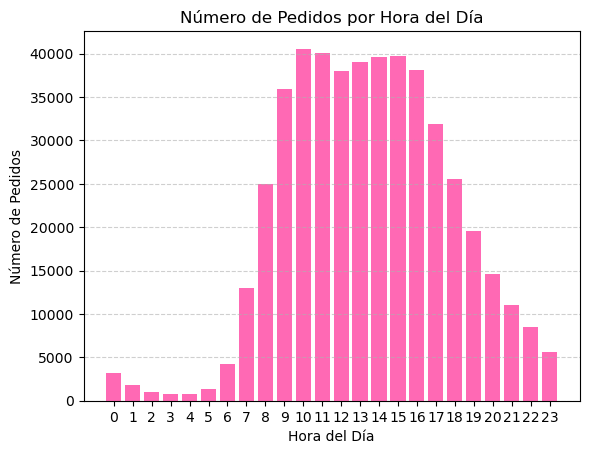

In [38]:
orders_by_hour = instacart_orders['order_hour_of_day'].value_counts().sort_index()

plt.bar(orders_by_hour.index, orders_by_hour.values, color='hotpink')

plt.title('Número de Pedidos por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Pedidos')
plt.xticks(range(0, 24)) 
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

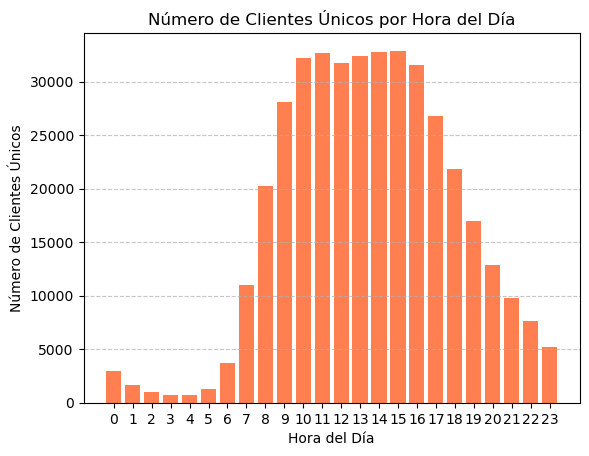

In [39]:
#pongo este ya que no se a que se refieren no entendi que solicitaban si la cantidad de personas que hacen pedidos, o la cantidad de pedidos
unique_users_by_hour = instacart_orders.groupby('order_hour_of_day')['user_id'].nunique()

plt.bar(unique_users_by_hour.index, unique_users_by_hour.values, color='coral')

plt.title('Número de Clientes Únicos por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Clientes Únicos')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()

Escribe aquí tus conclusiones

''' Como dije anteriormente no entendi muy bien lo solicitado entonces hice 2 tablas para ver la cantidad de clientes unicos y ver la cantidad de pedidos realizados, podemos ver que recibimos la mayor cantidad de pedidos a las 10am
mientras q tenemos mayor cantidad de clientes lo tenemos a las 4pm'''

### [A3] ¿Qué día de la semana compran víveres las personas?

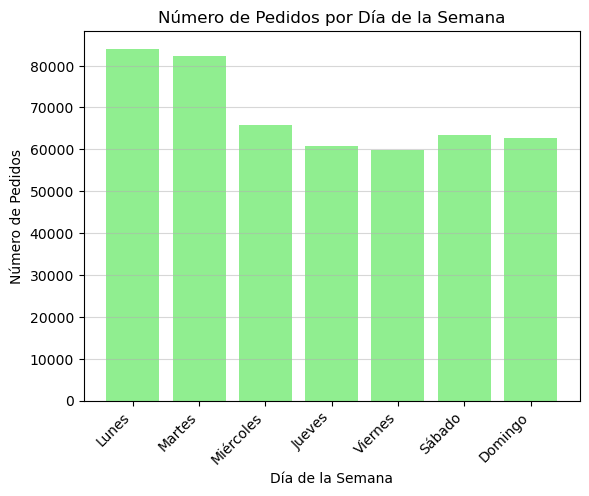

In [40]:
orders_by_day = instacart_orders['order_dow'].value_counts().sort_index()

day_labels = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
plt.bar(orders_by_day.index, orders_by_day.values, color='lightgreen')

plt.title('Número de Pedidos por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Pedidos')
plt.xticks(orders_by_day.index, day_labels, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5) 
plt.show()

Escribe aquí tus conclusiones

''' Nos queda demostrado que la tienda vende mas pedidos el dia Lunes, '''

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

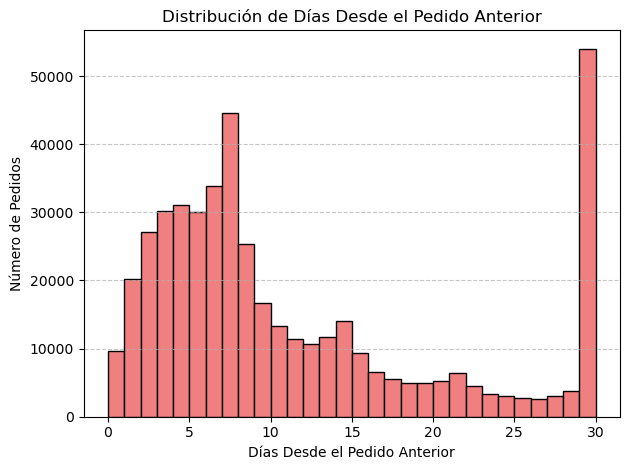

El valor mínimo de 'days_since_prior_order' es: 0.0 días
El valor máximo de 'days_since_prior_order' es: 30.0 días


In [41]:
days_since_prior = instacart_orders['days_since_prior_order'].dropna()


plt.hist(days_since_prior, bins=30, edgecolor='black', color='lightcoral')
plt.title('Distribución de Días Desde el Pedido Anterior')
plt.xlabel('Días Desde el Pedido Anterior')
plt.ylabel('Número de Pedidos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

min_days = days_since_prior.min()
max_days = days_since_prior.max()

print(f"El valor mínimo de 'days_since_prior_order' es: {min_days} días")
print(f"El valor máximo de 'days_since_prior_order' es: {max_days} días")

Escribe aquí tus conclusiones

'''El valor mínimo de 0 dias indica que hay usuarios que realizan pedidos con una frecuencia muy alta, incluso al dia siguiente.
El valor máximo de 30 dias sugiere que algunos usuarios pueden esperar un período considerable (alrededor de 1 meses) entre sus pedidos, o que volvieron a ordenar después de una larga pausa.
Es crucial recordar que los valores nulos (NaN) en esta columna representan el primer pedido de cada usuario, por lo que no tienen un pedido previo para calcular la espera.'''

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

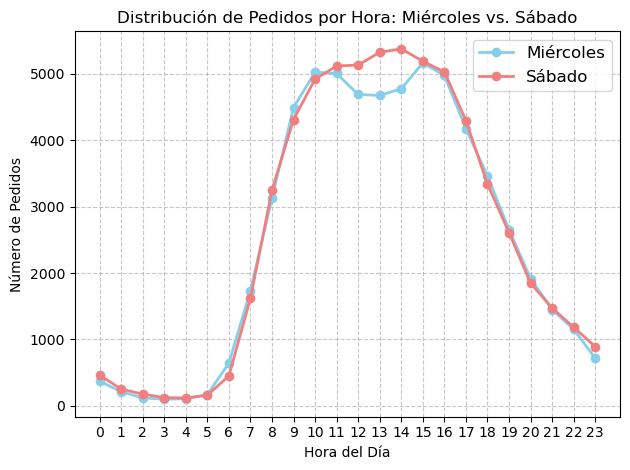

1. Picos de actividad:
-Los miércoles suelen mostrar un patrón de doble pico: uno en la mañana (ej. 9-11 AM) y otro en la tarde (ej. 5-7 PM), reflejando la rutina diaria de la semana.
--Los sábados presentan un pico más amplio y temprano, a menudo extendiéndose desde media mañana (ej. 10 AM) hasta el principio de la tarde (ej. 2-3 PM), lo que sugiere que las personas dedican la mañana del fin de semana a las compras.
2. Volumen General: Los sábados (y fines de semana en general) suelen tener un volumen total de pedidos significativamente mayor que los días entre semana, lo cual se evidenciará por las líneas más altas para el sábado.
3. Actividad nocturna/madrugada: Ambos días muestran baja actividad en la madrugada, pero la diferencia entre los picos y los valles es más pronunciada en los días de semana.
4. Patrón de descenso: El descenso en el número de pedidos hacia la noche puede variar; los sábados pueden mantener un nivel más alto de actividad hasta más tarde en comparación con lo

In [42]:
orders_wednesday = instacart_orders[instacart_orders['order_dow'] == 3]
orders_saturday = instacart_orders[instacart_orders['order_dow'] == 6]

hourly_orders_wednesday = orders_wednesday['order_hour_of_day'].value_counts().sort_index()
hourly_orders_saturday = orders_saturday['order_hour_of_day'].value_counts().sort_index()

all_hours = pd.Series(range(24))
hourly_orders_wednesday = hourly_orders_wednesday.reindex(all_hours, fill_value=0)
hourly_orders_saturday = hourly_orders_saturday.reindex(all_hours, fill_value=0)

plt.plot(hourly_orders_wednesday.index, hourly_orders_wednesday.values,
         label='Miércoles', color='skyblue', marker='o', linestyle='-', linewidth=2)
plt.plot(hourly_orders_saturday.index, hourly_orders_saturday.values,
         label='Sábado', color='lightcoral', marker='o', linestyle='-', linewidth=2)

plt.title('Distribución de Pedidos por Hora: Miércoles vs. Sábado')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Pedidos')
plt.xticks(range(0, 24)) 
plt.grid(axis='both', linestyle='--', alpha=0.7) 
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


print("1. Picos de actividad:")
print("-Los miércoles suelen mostrar un patrón de doble pico: uno en la mañana (ej. 9-11 AM) y otro en la tarde (ej. 5-7 PM), reflejando la rutina diaria de la semana.")
print("--Los sábados presentan un pico más amplio y temprano, a menudo extendiéndose desde media mañana (ej. 10 AM) hasta el principio de la tarde (ej. 2-3 PM), lo que sugiere que las personas dedican la mañana del fin de semana a las compras.")
print("2. Volumen General: Los sábados (y fines de semana en general) suelen tener un volumen total de pedidos significativamente mayor que los días entre semana, lo cual se evidenciará por las líneas más altas para el sábado.")
print("3. Actividad nocturna/madrugada: Ambos días muestran baja actividad en la madrugada, pero la diferencia entre los picos y los valles es más pronunciada en los días de semana.")
print("4. Patrón de descenso: El descenso en el número de pedidos hacia la noche puede variar; los sábados pueden mantener un nivel más alto de actividad hasta más tarde en comparación con los miércoles.")

Escribe aquí tus conclusiones

''' podemos ver que los sabados tien un pico mas amplio concentrado en la mañana y medio dia, indicaria que usualmente se usa ese dia para hacer la compra de la semana mientras que los miercoles seria como para productos de relleno 
osea que hacen falta o que se olvidaron comprar'''

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

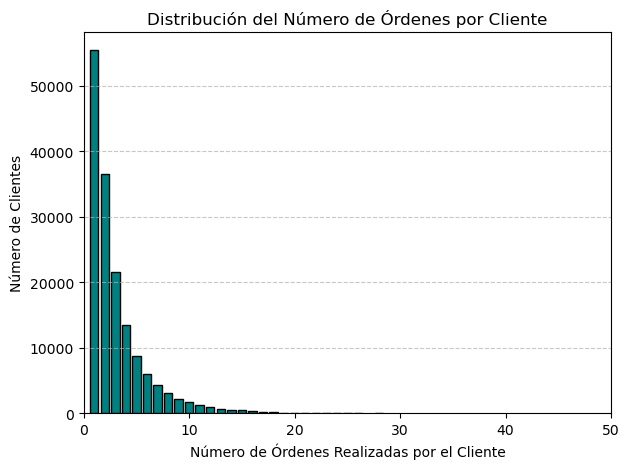

El gráfico muestra que la mayoría de los clientes realizan un número relativamente bajo de pedidos.
Número de clientes únicos: 157437
Clientes que realizaron 1 pedido: 55355
Clientes que realizaron 2 pedidos: 36508
El número máximo de pedidos realizados por un solo cliente es: 28
Esta distribución es típicamente sesgada hacia la izquierda, lo que significa que hay muchos clientes que compran pocas veces y un número decreciente de clientes que compran con mayor frecuencia.


In [43]:
orders_per_customer = instacart_orders.groupby('user_id').size()

order_counts_distribution = orders_per_customer.value_counts().sort_index()
plt.bar(order_counts_distribution.index, order_counts_distribution.values, color='teal', edgecolor='black')
plt.title('Distribución del Número de Órdenes por Cliente')
plt.xlabel('Número de Órdenes Realizadas por el Cliente')
plt.ylabel('Número de Clientes')

plt.xlim(0, 50)


plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("El gráfico muestra que la mayoría de los clientes realizan un número relativamente bajo de pedidos.")
print(f"Número de clientes únicos: {len(orders_per_customer)}")
print(f"Clientes que realizaron 1 pedido: {order_counts_distribution.get(1, 0)}")
print(f"Clientes que realizaron 2 pedidos: {order_counts_distribution.get(2, 0)}")
print(f"El número máximo de pedidos realizados por un solo cliente es: {orders_per_customer.max()}")
print("Esta distribución es típicamente sesgada hacia la izquierda, lo que significa que hay muchos clientes que compran pocas veces y un número decreciente de clientes que compran con mayor frecuencia.")

Escribe aquí tus conclusiones

''' como podemos ver tenemos relativamente poco clientes que hacen 1 pedido y el numero baja considerablemente a los clientes que realizaron 2 pedidos'''

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [44]:
product_counts = order_products['product_id'].value_counts()

product_counts_df = product_counts.reset_index()
product_counts_df.columns = ['product_id', 'order_frequency']

top_products_with_names = pd.merge(product_counts_df,
                                   products[['product_id', 'product_name']],
                                   on='product_id',
                                   how='left')

top_20_products = top_products_with_names.head(20)
top_20_products_renamed_alt = top_20_products.copy()
top_20_products_renamed_alt.columns = ['ID del Producto', 'cantidad pedida', 'Nombre del Producto']
print("--- Los 20 Productos Más Frecuentemente Pedidos ---")

print(top_20_products_renamed_alt[['ID del Producto', 'Nombre del Producto', 'cantidad pedida']].to_string())

--- Los 20 Productos Más Frecuentemente Pedidos ---
    ID del Producto       Nombre del Producto  cantidad pedida
0             24852                    BANANA            66050
1             13176    BAG OF ORGANIC BANANAS            53297
2             21137      ORGANIC STRAWBERRIES            37039
3             21903      ORGANIC BABY SPINACH            33971
4             47209      ORGANIC HASS AVOCADO            29773
5             47766           ORGANIC AVOCADO            24689
6             47626               LARGE LEMON            21495
7             16797              STRAWBERRIES            20018
8             26209                     LIMES            19690
9             27845        ORGANIC WHOLE MILK            19600
10            27966       ORGANIC RASPBERRIES            19197
11            22935      ORGANIC YELLOW ONION            15898
12            24964            ORGANIC GARLIC            15292
13            45007          ORGANIC ZUCCHINI            14584
14 

Escribe aquí tus conclusiones

'''mostramos los 20 productos mas pedidos y podemos observar que la mayoria son frutas'''

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [45]:
items_per_order = final_merged_df.groupby('order_id').size()

# 2. Análisis Básico de la Distribución
print("--- Cantidad de Artículos por Pedido ---")
print(f"Número total de pedidos analizados: {len(items_per_order)}")
print(f"Número promedio de artículos por pedido: {items_per_order.mean():.2f}")
print(f"Número mínimo de artículos en un pedido: {items_per_order.min()}")
print(f"Número máximo de artículos en un pedido: {items_per_order.max()}")


--- Cantidad de Artículos por Pedido ---
Número total de pedidos analizados: 450046
Número promedio de artículos por pedido: 10.10
Número mínimo de artículos en un pedido: 1
Número máximo de artículos en un pedido: 127


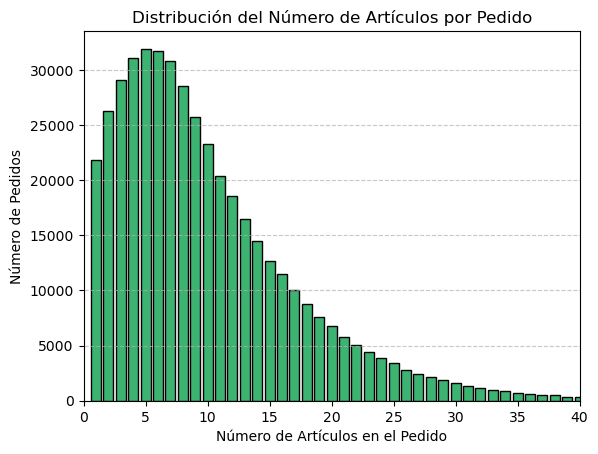


--- Interpretación de la Distribución del Número de Artículos por Pedido ---
Al observar el gráfico, puedes notar que la distribución es típicamente sesgada a la derecha.
Esto significa que la mayoría de los pedidos (las barras más altas) contienen un número relativamente bajo de artículos.
A medida que el número de artículos por pedido aumenta, la frecuencia de esos pedidos (la altura de las barras) disminuye rápidamente, formando una 'cola' larga hacia la derecha.

- El pico de la distribución (la barra más alta) nos mostrará la cantidad de artículos más común en un pedido.
- Mientras que la forma de la cola nos indica qué tan frecuentes son los pedidos con muchos artículos.
- Este patrón es común y sugiere que nuestra tienda maneja tanto pedidos pequeños y rápidos como compras semanales más grandes, aunque los pequeños son más comunes.


In [46]:
items_per_order = final_merged_df.groupby('order_id').size()
distribution_of_items_count = items_per_order.value_counts().sort_index()

plt.bar(distribution_of_items_count.index, distribution_of_items_count.values,
        color='mediumseagreen', edgecolor='black')


plt.title('Distribución del Número de Artículos por Pedido')
plt.xlabel('Número de Artículos en el Pedido')
plt.ylabel('Número de Pedidos')
plt.xlim(0, 40)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("\n--- Interpretación de la Distribución del Número de Artículos por Pedido ---")
print("Al observar el gráfico, puedes notar que la distribución es típicamente sesgada a la derecha.")
print("Esto significa que la mayoría de los pedidos (las barras más altas) contienen un número relativamente bajo de artículos.")
print("A medida que el número de artículos por pedido aumenta, la frecuencia de esos pedidos (la altura de las barras) disminuye rápidamente, formando una 'cola' larga hacia la derecha.")
print()
print("- El pico de la distribución (la barra más alta) nos mostrará la cantidad de artículos más común en un pedido.")
print("- Mientras que la forma de la cola nos indica qué tan frecuentes son los pedidos con muchos artículos.")
print("- Este patrón es común y sugiere que nuestra tienda maneja tanto pedidos pequeños y rápidos como compras semanales más grandes, aunque los pequeños son más comunes.")

Escribe aquí tus conclusiones

''' Como hemos comentado tenemos que en promedio nuestros clienten compran 10 productos por pedido, si bien en la distribucion podemos ver observar que muchas tenemos muchos pedidos con pocos articulos'''

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [47]:
reordered_products = order_products[order_products['reordered'] == 1]
reordered_counts = reordered_products['product_id'].value_counts()
reordered_counts_df = reordered_counts.reset_index()
reordered_counts_df.columns = ['product_id', 'reorder_frequency']

top_reordered_products_with_names = pd.merge(reordered_counts_df,
                                             products[['product_id', 'product_name']],
                                             on='product_id',
                                             how='left')


top_20_reordered = top_reordered_products_with_names.head(20)
print(top_20_reordered[['product_id', 'product_name', 'reorder_frequency']].to_string())


    product_id              product_name  reorder_frequency
0        24852                    BANANA              55763
1        13176    BAG OF ORGANIC BANANAS              44450
2        21137      ORGANIC STRAWBERRIES              28639
3        21903      ORGANIC BABY SPINACH              26233
4        47209      ORGANIC HASS AVOCADO              23629
5        47766           ORGANIC AVOCADO              18743
6        27845        ORGANIC WHOLE MILK              16251
7        47626               LARGE LEMON              15044
8        27966       ORGANIC RASPBERRIES              14748
9        16797              STRAWBERRIES              13945
10       26209                     LIMES              13327
11       22935      ORGANIC YELLOW ONION              11145
12       24964            ORGANIC GARLIC              10411
13       45007          ORGANIC ZUCCHINI              10076
14       49683            CUCUMBER KIRBY               9538
15       28204        ORGANIC FUJI APPLE

Escribe aquí tus conclusiones

''' como podemos ver los productos son articulos basico de consumo diario la mayoria de los cuales no podemos precindir '''

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [48]:
total_orders_per_product = order_products['product_id'].value_counts().reset_index()
total_orders_per_product.columns = ['product_id', 'total_orders']

reorders_per_product = order_products[order_products['reordered'] >= 1]['product_id'].value_counts().reset_index()
reorders_per_product.columns = ['product_id', 'total_reorders']

product_reorder_data = pd.merge(total_orders_per_product,
                                reorders_per_product,
                                on='product_id',
                                how='left')

product_reorder_data['reorder_rate'] = (product_reorder_data['total_reorders'] / product_reorder_data['total_orders'])

products_with_reorder_rate = pd.merge(product_reorder_data,
                                      products[['product_id', 'product_name']],
                                      on='product_id',
                                      how='left')

products_with_reorder_rate = products_with_reorder_rate.sort_values(by='total_reorders', ascending=False)
print("               Productos con la Tasa de Repetición de Pedido Más Alta")
print(products_with_reorder_rate[['product_id', 'product_name', 'total_orders', 'total_reorders', 'reorder_rate']].head(10).to_string(index=False))


               Productos con la Tasa de Repetición de Pedido Más Alta
 product_id           product_name  total_orders  total_reorders  reorder_rate
      24852                 BANANA         66050         55763.0      0.844254
      13176 BAG OF ORGANIC BANANAS         53297         44450.0      0.834006
      21137   ORGANIC STRAWBERRIES         37039         28639.0      0.773212
      21903   ORGANIC BABY SPINACH         33971         26233.0      0.772217
      47209   ORGANIC HASS AVOCADO         29773         23629.0      0.793639
      47766        ORGANIC AVOCADO         24689         18743.0      0.759164
      27845     ORGANIC WHOLE MILK         19600         16251.0      0.829133
      47626            LARGE LEMON         21495         15044.0      0.699884
      27966    ORGANIC RASPBERRIES         19197         14748.0      0.768245
      16797           STRAWBERRIES         20018         13945.0      0.696623


Escribe aquí tus conclusiones

'''aca estamos viendo que 9 de nuestros 10 productos son frutas o verduras y tenemos 1 lacteo, interesante dato a la hora de hablar con los proveedores para saber cada cuanto tienen que surtir en la tienda'''

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [49]:
reorder_proportion_per_customer = final_merged_df.groupby('user_id')['reordered'].agg(
    total_reordered_products='sum',
    total_products_ordered='count'
)
reorder_proportion_per_customer['reorder_proportion'] = (
    reorder_proportion_per_customer['total_reordered_products'] /
    reorder_proportion_per_customer['total_products_ordered']
)

reorder_proportion_per_customer['reorder_proportion_pct'] = (reorder_proportion_per_customer['reorder_proportion'] * 100).round(2)
print(f"Número total de clientes analizados: {len(reorder_proportion_per_customer)}")
print(f"Proporción promedio de productos reordenados por cliente: {reorder_proportion_per_customer['reorder_proportion'].mean():.2%}")




Número total de clientes analizados: 149626
Proporción promedio de productos reordenados por cliente: 49.49%


In [50]:
reorder_rate_per_user = final_merged_df.groupby('user_id')['reordered'].agg(
    total_reordered_items='sum',
    total_items_ordered='count'
)
reorder_rate_per_user['user_reorder_rate'] = (
    reorder_rate_per_user['total_reordered_items'] /
    reorder_rate_per_user['total_items_ordered']
)
print(f"Tasa mínima de repetición: {reorder_rate_per_user['user_reorder_rate'].min():.2%}")
print(f"Tasa máxima de repetición: {reorder_rate_per_user['user_reorder_rate'].max():.2%}")

Tasa mínima de repetición: 0.00%
Tasa máxima de repetición: 100.00%


Escribe aquí tus conclusiones

''' como podemos observar el promedio de productos que vuelven a pedir es de 49.49% y la tasa maxima es de 100% mientras que la minima es 0%'''

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [51]:
first_added_products = order_products[order_products['add_to_cart_order'] == 1]
first_added_counts = first_added_products['product_id'].value_counts().reset_index()
first_added_counts.columns = ['product_id', 'times_added_first']

top_first_added_products = pd.merge(first_added_counts,
                                    products[['product_id', 'product_name']],
                                    on='product_id',
                                    how='left')

top_20_first_added = top_first_added_products.head(20)

print("Los 20 Principales Artículos que la Gente Pone Primero en sus Carritos ")
print(top_20_first_added[['product_id', 'product_name', 'times_added_first']].to_string(index=False))


Los 20 Principales Artículos que la Gente Pone Primero en sus Carritos 
 product_id                product_name  times_added_first
      24852                      BANANA              15562
      13176      BAG OF ORGANIC BANANAS              11026
      27845          ORGANIC WHOLE MILK               4363
      21137        ORGANIC STRAWBERRIES               3946
      47209        ORGANIC HASS AVOCADO               3390
      21903        ORGANIC BABY SPINACH               3336
      47766             ORGANIC AVOCADO               3044
      19660                SPRING WATER               2336
      16797                STRAWBERRIES               2308
      27966         ORGANIC RASPBERRIES               2024
      44632  SPARKLING WATER GRAPEFRUIT               1914
      49235         ORGANIC HALF & HALF               1797
      47626                 LARGE LEMON               1737
        196                        SODA               1733
      38689    ORGANIC REDUCED FAT MILK    

Escribe aquí tus conclusiones

''' Como mencionamos anteriormente la mayoria son frutas aunque tambien podemos otros productos como soda y son articulos basicos de rotacion alta'''

### Conclusion general del proyecto:

La conclucion general seria:
- los Fines de semana son el dia preferido para compras grandes planificadas
- los dias se mana se usan para pedidos rapidos y de reposicion
- predomina las compras pequeñas a mediana
- hay una fuerte tendencia a reordenar productos basicos esenciales (frutas, lacteos)
-pudimos ver cuales son los productos ancla en el ultimo ejercicio 

----------------------------------------------
en General fue un reto bastante interesante y entrenido de realizar me gusto bastante